In [1]:
# prompt: import python module for linear regression pandas, matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# df = pd.re

In [2]:
df = pd.read_csv('/content/SAT_SCORES.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [4]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


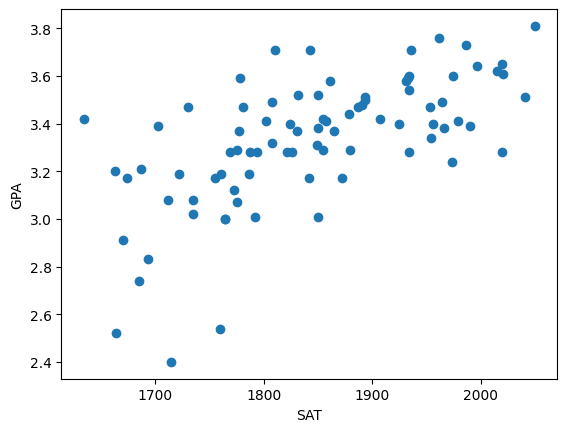

In [5]:
plt.scatter(df['SAT'], df['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

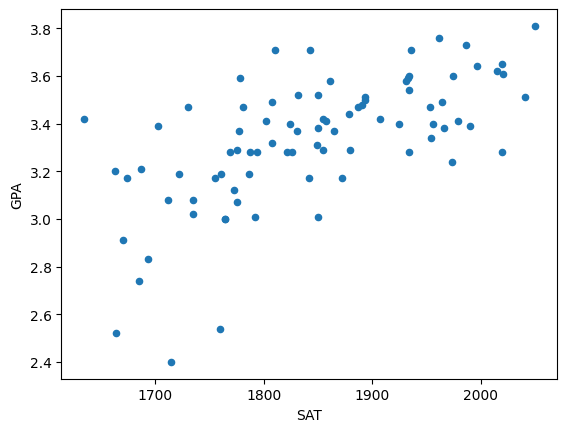

In [7]:
df.plot(kind='scatter', x='SAT', y='GPA')
plt.show()

In [8]:
model = LinearRegression()
model.fit(df[['SAT']], df['GPA'])

LinearRegression()

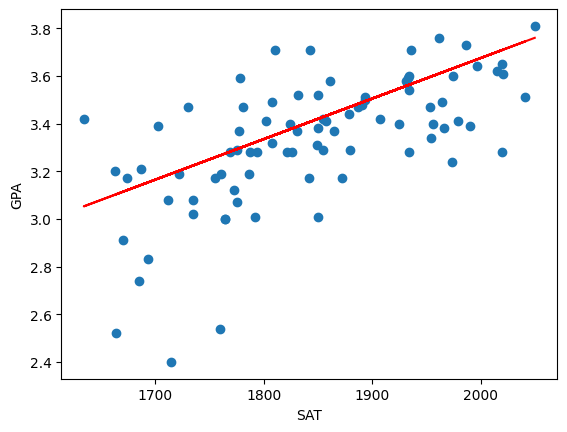

In [10]:
x1 = df['SAT']
y =  df['GPA']
plt.scatter(x1, y)
m = 0.0017
c = 0.275
yhat = m*x1 + c
plt.plot(x1, yhat, color='red', label = 'Regression Line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()


In [14]:
df_auto = pd.read_csv('/content/auto-mpg.csv')
df_auto.head()
feature = ['mpg','weight']
df_auto_new = df_auto[feature]
df_auto_new

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


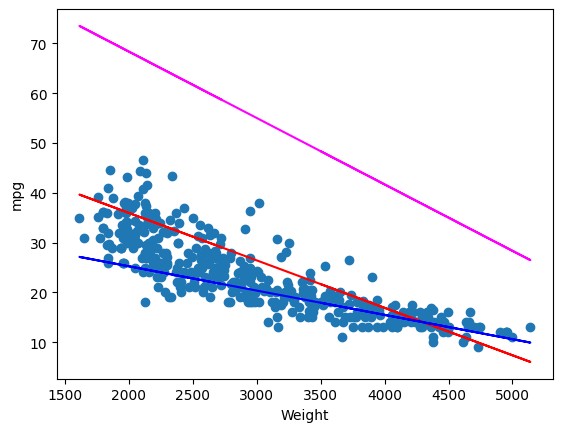

In [21]:
y = df_auto_new['mpg']
x = df_auto_new['weight']
plt.scatter(x, y)
plt.ylabel('mpg')
plt.xlabel('Weight')
# plot couple of straight line with random m & c values
y1 = (-0.009524)*x + (55)
y2 = (-0.004878)*x + (35)
y3 = (-0.01333)*x + (95)
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='blue')
plt.plot(x, y3, color='magenta')
plt.show()


plt.show()

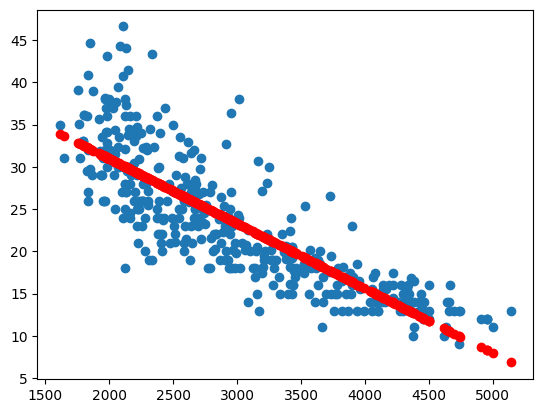

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

lr_model = LinearRegression()

X = df_auto_new[['weight']] # in lr_model the x variable is expected as data frame and 'y' variable as series
y = df_auto_new['mpg']
x = df_auto_new['weight']  ## x is series; X is df

lr_model.fit(X, y)
y_predicted = lr_model.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_predicted, color='red')
plt.show()

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:


print(lr_model.coef_)  # slope
print(lr_model.intercept_) # intercept


[-0.00767661]
46.31736442026563


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_model.fit(X_train, y_train)
y_predicted = lr_model.predict(X_test)
lr_model.score(X_test, y_test)

0.7407718240772794

In [38]:
X1 = df_auto['weight'].values.reshape(-1, 1)
y1 = df_auto['mpg'].values.reshape(-1, 1)
# plt.scatter(X1, y1)
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)
y_predicted = lr_model1.predict(X_test)
lr_model1.score(X_test, y_test)

0.7407718240772794

In [37]:
X1 = df_auto[['weight']]
y1 = df_auto['mpg']
# plt.scatter(X1, y1)
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)
y_predicted = lr_model2.predict(X_test)
lr_model2.score(X_test, y_test)

0.7407718240772794

In [40]:
df_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_predicted

,Actual,Predicted
0,14.0,14.740671
1,25.0,26.768594
2,13.0,13.490130
3,21.0,23.456557
4,18.0,21.114637
...,...,...
75,30.9,29.133252
76,26.0,28.867986
77,32.0,30.853693
78,24.5,29.633469


In [31]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:


from sklearn.preprocessing import LabelEncoder

# Assuming 'car name' is the column you want to label encode
le = LabelEncoder()
df_auto['car name'] = le.fit_transform(df_auto['car name'])
df_auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


Car multivariate .. changing the text to number (label encoder)

In [66]:
df_car = pd.read_csv('/content/CARS.csv')
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [63]:
# df_car['name'].str.split(' ', expand=True)
# df_car['name'].str.split(' ', )
df_car['make'] = df_car['name'].str.split(' ', expand=True)[0]
df_car['model'] = df_car['name'].str.split(' ', expand=True)[1]
df_car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,make,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta


In [56]:
df_car['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [64]:
# prompt: create one hot encoding on fuel col on df_car


# Perform one-hot encoding on the 'fuel' column
df_car = pd.get_dummies(df_car, columns=['fuel'], prefix='fuel')
df_car.head()


,name,year,selling_price,km_driven,seller_type,transmission,owner,make,model,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,Individual,Manual,First Owner,Maruti,800,False,False,False,False,True
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,Manual,First Owner,Maruti,Wagon,False,False,False,False,True
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,Manual,First Owner,Hyundai,Verna,False,True,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,Individual,Manual,First Owner,Datsun,RediGO,False,False,False,False,True
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Manual,Second Owner,Honda,Amaze,False,True,False,False,False


In [67]:
# prompt: drop name and owner column df_car

# Drop the 'name' and 'owner' columns from the df_car DataFrame
df_car1 = df_car.drop(['name','owner'], axis=1)
df_car1.head()


,year,selling_price,km_driven,fuel,seller_type,transmission
0,2007,60000,70000,Petrol,Individual,Manual
1,2007,135000,50000,Petrol,Individual,Manual
2,2012,600000,100000,Diesel,Individual,Manual
3,2017,250000,46000,Petrol,Individual,Manual
4,2014,450000,141000,Diesel,Individual,Manual
